<a href="https://colab.research.google.com/github/marcelogarret/rna/blob/main/RNA_aula01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np

def criaDataset(n=20, slop=[2, 1], intercept=0):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [-1, 1]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.20316876, 0.06092859],
        [0.71718451, 0.37598415],
        [0.24799811, 0.18361972],
        [0.53831934, 0.23216921],
        [0.17485453, 0.84610663],
        [0.180969  , 0.87161758],
        [0.25607128, 0.27529319],
        [0.68453735, 0.38313441],
        [0.10228029, 0.76669394],
        [0.8580218 , 0.18911778],
        [0.52520786, 0.17444604],
        [0.77958124, 0.35737057],
        [0.91509393, 0.50970373],
        [0.16803679, 0.98950839],
        [0.06810394, 0.43213724],
        [0.20728419, 0.45012716],
        [0.90363111, 0.52529174],
        [0.36007979, 0.35547548],
        [0.06315945, 0.01723674],
        [0.45458985, 0.83177916]]),
 array([ 1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,
         1,  1, -1]))

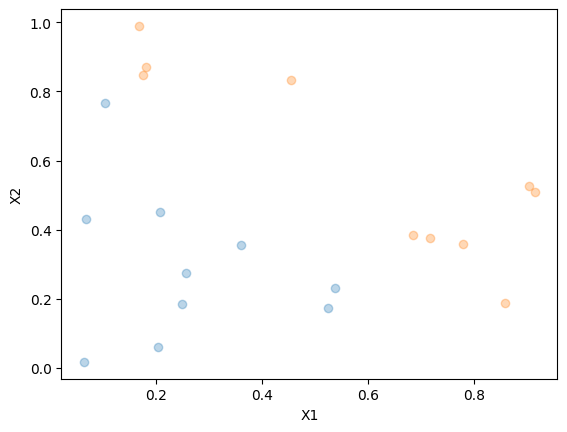

In [30]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotDataset(X, y)

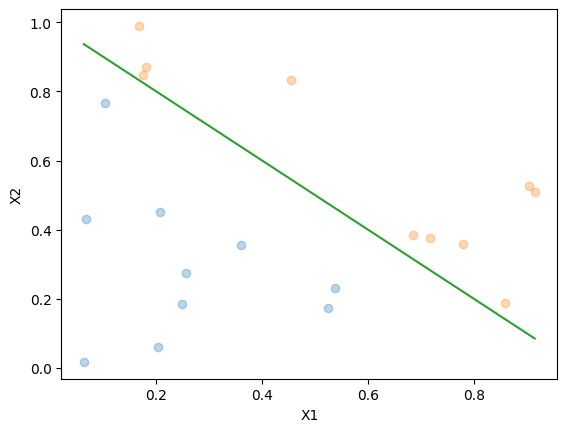

In [31]:
def plotHiperplano(X, y, vetor, intercept):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X,y,vetor_hiperplano, intercept)

In [32]:
def sign(a):
  return (a >= 0) * 2 - 1

1.0
[ 20.22490038 -19.47122962 -20.47528509]


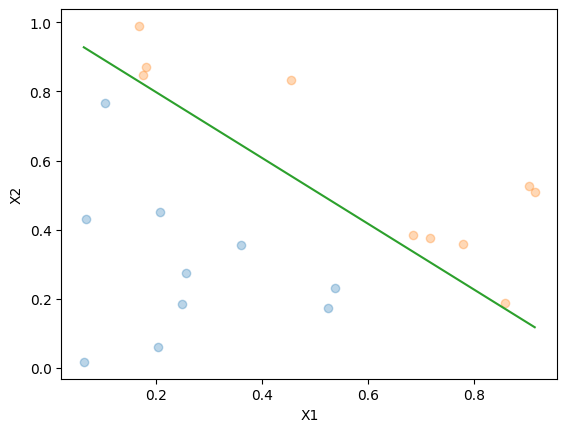

In [33]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.w = None
    self.activation = sign
    self.max_iter = max_iter

  def fit(self, X, Y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.982
[ 20.22490038 -19.47122962 -20.47528509]


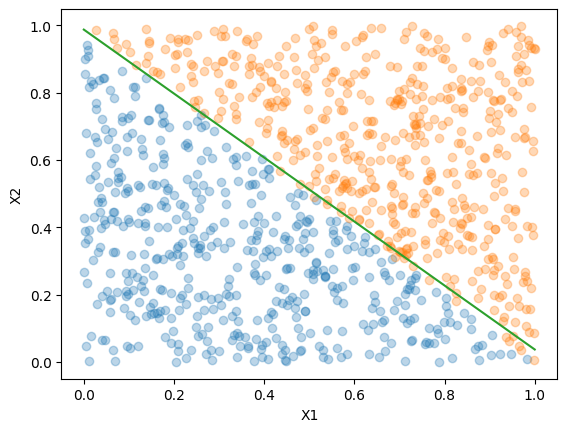

In [34]:
Xte, yte = criaDataset(1000, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])